In [1]:
import tensorflow as tf
import magenta as mg
import numpy as np
import sys

from magenta.common import tf_lib

In [2]:
RL_CODE_PATH = "/home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner"

In [3]:
sys.path.append(RL_CODE_PATH)
import rl_tuner
import rl_tuner_ops

In [4]:
# Place to save your model checkpoints and compositions
SAVE_PATH = "/home/natasha/Dropbox (MIT)/Google/RL-RNN-Project/rl_rnn_output"

In [5]:
# Model parameter settings
hparams = rl_tuner_ops.small_model_hparams()
ALGORITHM = 'q'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = 50000
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [6]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,
                                  store_every_nth=1,
                                  train_every_nth=5,
                                  minibatch_size=32,
                                  discount_rate=0.5,
                                  max_experience=100000,
                                  target_network_update_rate=0.01)

## Train network

In [7]:
reload(rl_tuner_ops)
reload(rl_tuner)
rl_tuner.reload_files()

In [8]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, CHECKPOINT_DIR, MIDI_PRIMER, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH, 
                          training_file_list=[TRAINING_DATA_PATH],
                          backup_checkpoint_file=CHECKPOINT_FILE,
                          custom_hparams=hparams,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

checkpoint dir /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/train
can't find checkpoint file, using backup, which is /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint file /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint dir /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/train
can't find checkpoint file, using backup, which is /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint file /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint dir /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/train
can't find checkpoint file, using backup, which is /home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tuner/testdata/model.ckpt-1994
checkpoint file /home/na

Generated sequence: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


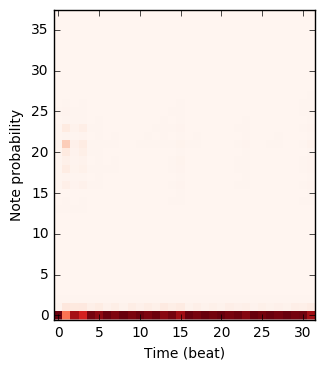

In [9]:
# Generate initial music sequence before training with RL
rl_net.generate_music_sequence(visualize_probs=True, title='pre_rl', length=32)

In [10]:
rl_net.train(num_steps=1000000, exploration_period=500000)

Evaluating initial model...
Evaluating model...
Training iteration 50000
	Reward for last 50000 steps: -271424.017263
		Music theory reward: -18886.8598238
		Note RNN reward: -252537.157439
	Exploration probability is 0.9042382
Evaluating model...
Training iteration 100000
	Reward for last 50000 steps: -255185.966077
		Music theory reward: -12125.2099187
		Note RNN reward: -243060.756158
	Exploration probability is 0.8084782
Evaluating model...
Training iteration 150000
	Reward for last 50000 steps: -233081.870242
		Music theory reward: 727.458288373
		Note RNN reward: -233809.328531
	Exploration probability is 0.7127182
Evaluating model...
Training iteration 200000
	Reward for last 50000 steps: -212603.574137
		Music theory reward: 7091.15951555
		Note RNN reward: -219694.733652
	Exploration probability is 0.6169582
Evaluating model...
Training iteration 250000
	Reward for last 50000 steps: -192635.001738
		Music theory reward: 10697.5611419
		Note RNN reward: -203332.56288
	Explorati

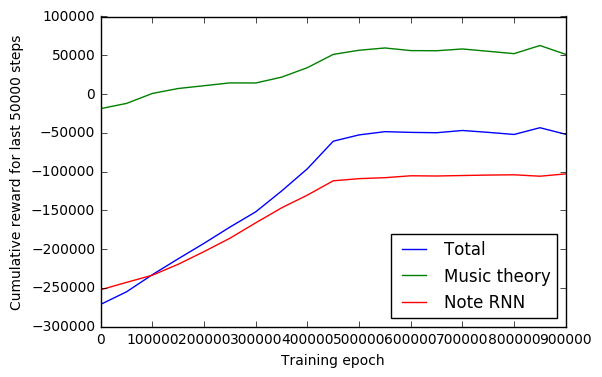

In [11]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

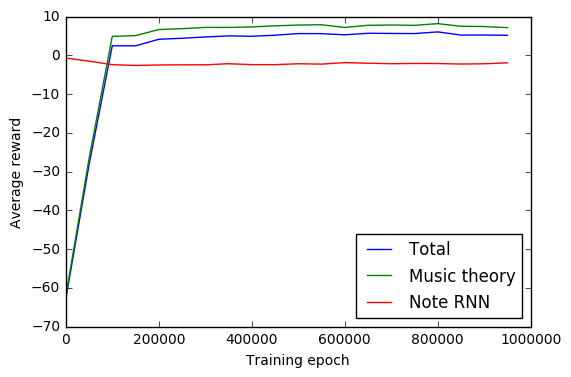

In [12]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
rl_net.plot_evaluation()

Generated sequence: [0, 0, 26, 33, 0, 33, 0, 0, 1, 23, 0, 24, 28, 0, 0, 26, 0, 0, 1, 23, 21, 19, 0, 14, 0, 0, 1, 11, 0, 13, 0, 9]


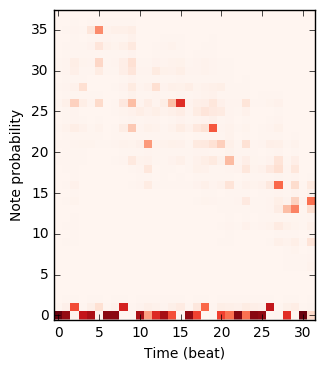

In [13]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_rl')

In [14]:
# If you're happy with the model, save a version!
rl_net.save_model(SAVE_PATH, 'my_cool_model')

In [15]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

Total compositions: 100.0
Total notes:3200.0
	Compositions starting with tonic: 5.0
	Compositions with unique highest note:67.0
	Compositions with unique lowest note:58.0
	Number of resolved leaps:36.0
	Number of double leaps:23.0
	Notes not in key:60.0
	Notes in motif:2068.0
	Notes in repeated motif:9.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.05
	Percent compositions with unique highest note:0.67
	Percent compositions with unique lowest note:0.58
	Percent of leaps resolved:0.610169491525
	Percent notes not in key:0.01875
	Percent notes in motif:0.64625
	Percent notes in repeated motif:0.0028125
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:-0.246255318876
	Average autocorrelation of lag2:0.0495607766279
	Average autocorrelation of lag3:0.0171622880941

	Avg. num octave jumps per composition:0.06
	Avg. num sevenths per composition:0.01
	Avg. num fifths per composition:0.43
	Avg. num sixths per composition:0.27
	Avg. num f